# Figure 2:  Proportion of sites that fully disallow any AI-related user agent, broken down by site rank
top 5k v.s. everything else (as everything else is pretty much identical)

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("../partition2filenames.json") as f:
    partition2filenames = json.load(f)

In [3]:
with open("../../tranco_top_1k.csv") as f:
    tranco_top1k = pd.read_csv(f)

In [5]:
def is_domain_in_scope(intersection_websites, domain):
    if domain in intersection_websites:
        return True
    else:
        if domain.startswith("www."):
            if domain[4:] in intersection_websites:  # remove www. and check again
                return True
        else:
            if "www." + domain in intersection_websites:  # add www. and check again
                return True

In [6]:
user_agents = [
    "Amazonbot",
    "AI2Bot",
    "anthropic-ai",
    "Applebot",
    "Applebot-Extended",
    "Bytespider",
    "CCBot",
    "ChatGPT-User",
    "Claude-Web",
    "ClaudeBot",
    "cohere-ai",
    "Diffbot",
    "FacebookBot",
    "Google-Extended",
    "GPTBot",
    "Kangaroo Bot",
    "Meta-ExternalAgent",
    "Meta-ExternalFetcher",
    "OAI-SearchBot",
    "omgili",
    "PerplexityBot",
    "Timpibot",
    "Webzio-Extended",
    "YouBot"
]

In [7]:
with open("any_AI_ua_results_top2k.json", "r") as f:
    all_any_ua_results = json.load(f)

In [8]:
len(all_any_ua_results['2022-05'])

31494

In [9]:
def get_stats_for_top_x_to_n(x, n, all_any_ua_results):
    print("n=", n)
    if n != 100000:
        top_n = set(tranco_top1k['domain'].tolist()[x:n])
        res = {}
        for snapshot in partition2filenames:
            res[snapshot] = {k: v for k, v in all_any_ua_results[snapshot].items() if is_domain_in_scope(top_n, k)}
    else:
        res = all_any_ua_results
    
    set_list = [set(res[snapshot].keys()) for snapshot in res]
    
    valid_sites = set_list[0].intersection(*set_list[1:])
    print("HERERE", len(valid_sites))

    final_res = {}
    for snapshot in res:
        final_res[snapshot] = {k: v for k, v in res[snapshot].items() if is_domain_in_scope(valid_sites, k)}

    print(len(final_res['2022-05']))
    res = final_res
    

    # get aggregate stats for each historical snapshot
    # NOTE: THE PROPORTION DOES NOT INCLUDE 404s!!!!!!!!!
    historical_any_ua_stats = {}
    for snapshot in partition2filenames:
        # print(len(res[snapshot]))
        df = pd.DataFrame(res[snapshot]).T
        props = {
            "total": len(df),
            "fully_disallowed_any (mentioned)": len(df[df['fully_disallowed_any (mentioned)'] == True]),
            "fully_disallowed_any (wildcard)": len(df[df['fully_disallowed_any (wildcard)'] == True]),
            "partially_disallowed_any (mentioned)": len(df[df['partially_disallowed_any (mentioned)'] == True]),
            "partially_disallowed_any (wildcard)": len(df[df['partially_disallowed_any (wildcard)'] == True]),
            "no_restrictions_any (mentioned)": len(df[df['no_restrictions_any (mentioned)'] == True]),
            "no_restrictions_any (wildcard)": len(df[df['no_restrictions_any (wildcard)'] == True]),
        }
        historical_any_ua_stats[snapshot] = props
        # print(props)
    # print(historical_any_ua_stats)

    historical_any_ua_props = {}
    for snapshot in historical_any_ua_stats:
        stats = historical_any_ua_stats[snapshot]
        total = sum([stats[k] for k in stats if k != 'total'])
        # print(snapshot, total)
        props = {k: v/total for k, v in stats.items() if k != 'total'}
        # print(props['fully_disallowed_any (mentioned)'])
        historical_any_ua_props[snapshot] = props
    return historical_any_ua_props, final_res

In [10]:
t1, top5k = get_stats_for_top_x_to_n(0, 5000, all_any_ua_results)

n= 5000
HERERE 1714
1714


In [11]:
def get_stats_for_top_x_to_n_exclude(x, n, all_any_ua_results, exclude_sites):
    top_n = set(tranco_top1k['domain'].tolist()[x:n])
    res = {}
    for snapshot in partition2filenames:
        res[snapshot] = {k: v for k, v in all_any_ua_results[snapshot].items() if not is_domain_in_scope(exclude_sites, k)}

    print(len(res))
    # get aggregate stats for each historical snapshot
    # NOTE: THE PROPORTION DOES NOT INCLUDE 404s!!!!!!!!!
    historical_any_ua_stats = {}
    for snapshot in partition2filenames:
        # print(len(res[snapshot]))
        df = pd.DataFrame(res[snapshot]).T
        props = {
            "total": len(df),
            "fully_disallowed_any (mentioned)": len(df[df['fully_disallowed_any (mentioned)'] == True]),
            "fully_disallowed_any (wildcard)": len(df[df['fully_disallowed_any (wildcard)'] == True]),
            "partially_disallowed_any (mentioned)": len(df[df['partially_disallowed_any (mentioned)'] == True]),
            "partially_disallowed_any (wildcard)": len(df[df['partially_disallowed_any (wildcard)'] == True]),
            "no_restrictions_any (mentioned)": len(df[df['no_restrictions_any (mentioned)'] == True]),
            "no_restrictions_any (wildcard)": len(df[df['no_restrictions_any (wildcard)'] == True]),
        }
        historical_any_ua_stats[snapshot] = props
        # print(props)
    # print(historical_any_ua_stats)

    historical_any_ua_props = {}
    for snapshot in historical_any_ua_stats:
        stats = historical_any_ua_stats[snapshot]
        total = sum([stats[k] for k in stats if k != 'total'])
        # print(snapshot, total)
        props = {k: v/total for k, v in stats.items() if k != 'total'}
        # print(props['fully_disallowed_any (mentioned)'])
        historical_any_ua_props[snapshot] = props
    return historical_any_ua_props

In [12]:
rest = get_stats_for_top_x_to_n_exclude(0, 100000, all_any_ua_results, top5k)

15


In [14]:
dates_have = ['Oct 2022',
 'Dec 2022',
 'Feb 2023',
 'Apr 2023',
 'Jun 2023',
 'Oct 2023',
 'Dec 2023',
 'Mar 2024',
 'Apr 2024',
 'May 2024',
 'Jun 2024',
 'Jul 2024',
 'Aug 2024',
 'Sep 2024',
 'Oct 2024']

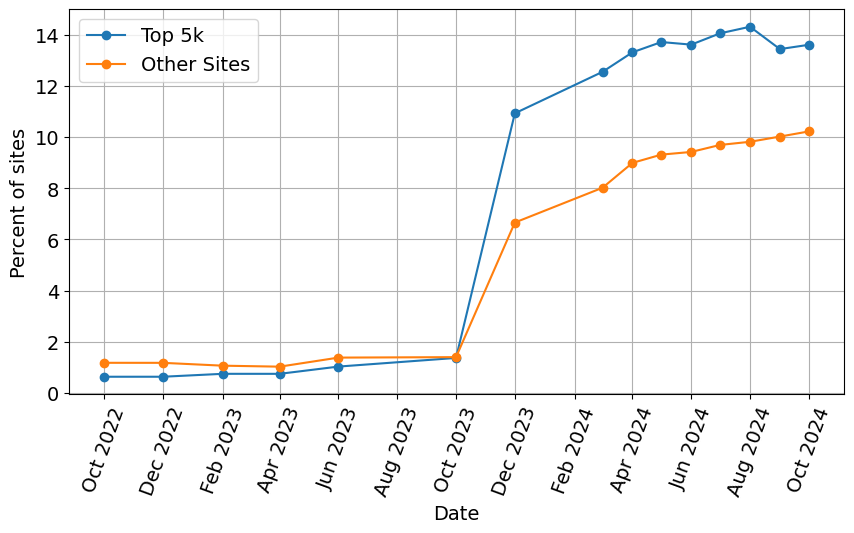

In [ ]:
from datetime import datetime
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))

# for ua in historical_any_ua_props:
df = pd.DataFrame(t1).T.sort_index()
df.index= [datetime.strptime(key, "%b %Y") for key in dates_have]
plt.plot(df['fully_disallowed_any (mentioned)']*100, label='Top 5k', marker='o')
df = pd.DataFrame(rest).T.sort_index()
df.index= [datetime.strptime(key, "%b %Y") for key in dates_have]
plt.plot(df['fully_disallowed_any (mentioned)']*100, label='Other Sites', marker='o')

# Format the x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Adjust interval as needed


FONTSIZE = 14
plt.xticks(rotation=70, fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.legend(prop={'size': FONTSIZE})
plt.ylabel("Percent of sites", fontsize=FONTSIZE)
# plt.axvline(x='2024-33', linestyle='--', color='black', alpha=0.5)
plt.xlabel("Date", fontsize=FONTSIZE)
plt.grid()
# plt.savefig("top5k_vs_rest.pdf", bbox_inches='tight')